In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak


## Get file and TTree, print branches, convert to array

In [3]:
events = ur.open("sim_neutron_barrel_1GeV.root:events")

print(events.keys())

['mcparticles', 'mcparticles/mcparticles.ID', 'mcparticles/mcparticles.g4Parent', 'mcparticles/mcparticles.reason', 'mcparticles/mcparticles.mask', 'mcparticles/mcparticles.steps', 'mcparticles/mcparticles.secondaries', 'mcparticles/mcparticles.pdgID', 'mcparticles/mcparticles.status', 'mcparticles/mcparticles.colorFlow[2]', 'mcparticles/mcparticles.genStatus', 'mcparticles/mcparticles.charge', 'mcparticles/mcparticles.spare[1]', 'mcparticles/mcparticles.spin[3]', 'mcparticles/mcparticles.vsx', 'mcparticles/mcparticles.vsy', 'mcparticles/mcparticles.vsz', 'mcparticles/mcparticles.vex', 'mcparticles/mcparticles.vey', 'mcparticles/mcparticles.vez', 'mcparticles/mcparticles.psx', 'mcparticles/mcparticles.psy', 'mcparticles/mcparticles.psz', 'mcparticles/mcparticles.pex', 'mcparticles/mcparticles.pey', 'mcparticles/mcparticles.pez', 'mcparticles/mcparticles.mass', 'mcparticles/mcparticles.time', 'mcparticles/mcparticles.properTime', 'mcparticles/mcparticles.parents_begin', 'mcparticles/mcp

In [13]:
def get_vector(events,varname='HcalEndcapHits',energy='energyDeposit'):
    E = events["%s.%s"%(varname,energy)].array(library='np')
    x = events["%s.position.x"%varname].array(library='np')
    y = events["%s.position.y"%varname].array(library='np')
    z = events["%s.position.z"%varname].array(library='np')
    #theta = events["%s.polar.theta"%varname].array(library='np')
    #phi = events["%s.polar.phi"%varname].array(library='np')

    return E,x, y, z, theta, phi

def get_truth(gen_events):
    pdgID = gen_events['mcparticles.pdgID'].array(library='np')
    status = gen_events['mcparticles.status'].array(library='np')
    genStatus = gen_events['mcparticles.genStatus'].array(library='np')
    pex = gen_events['mcparticles.psx'].array(library='np')
    pey = gen_events['mcparticles.psy'].array(library='np')
    pez = gen_events['mcparticles.psz'].array(library='np')
    mass = gen_events['mcparticles.mass'].array(library='np')

    return pdgID,status, genStatus,pex,pey,pez,mass

In [8]:
E = {}
x = {}
y = {}
z  = {}
theta={}
phi = {}

## Get data

# get hits

In [10]:

for i in ['HcalBarrel','EcalBarrelScFi']:#,'TrackerEndcap','VertexEndcap']:
    tag = i
    E[tag], x[tag], y[tag],z[tag],theta[tag],phi[tag] = get_vector(events,varname="%sHits"%i)



## get MC

In [15]:
def get_GeneratedValues(events):
    mc = {} 
    mc['pdgID'], mc['status'], mc['genStatus'], mc['pex'],mc['pey'], mc['pez'], mc['mass']= get_truth(events)
    for i in range(len(mc['pdgID'][0])):
        if(mc['genStatus'][0][i] !=1): continue
        px = mc['pex'][0][i]
        py =  mc['pey'][0][i]
        pz = mc['pez'][0][i]
        pt =  np.sqrt(px*px + py*py)
        p = np.sqrt(px*px+py*py+pz*pz)
        theta = np.arccos(pz/p)*180/np.pi
        print('MC particle ID ', mc['pdgID'][0][i],  'genStatus ', mc['genStatus'][0][i],
               ' px = %2.2f, py=%2.2f, pz=%2.2f'%(mc['pex'][0][i],mc['pey'][0][i],mc['pez'][0][i]))
        print('p = %2.2f , theta =%2.2f'%(p, theta))
    return p, theta

truth = {}
truth['p'], truth['theta'] = get_GeneratedValues(events)



MC particle ID  2112 genStatus  1  px = 0.01, py=1.00, pz=0.00
p = 1.00 , theta =89.73


## Get clusters

In [16]:
#for i in ['HcalBarrelClusters','HcalHadronEndcapClusters','EcalBarrelClusters','EcalEndcapClusters']:
#    E[i], x[i], y[i],z[i] = get_vector("%s"%i,energy='energy')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [18]:
print(x.keys())

dict_keys(['HcalBarrel', 'EcalBarrelScFi'])


## Plot 2D transverse view for hits in endcap

Event Number:  0
 Suma ECAL =38.46
Event Number:  1
 Suma ECAL =8.02
 Suma HCAL =0.02
Event Number:  2
 Suma ECAL =17.79
 Suma HCAL =11.07
Event Number:  3
 Suma ECAL =72.62
Event Number:  4
 Suma ECAL =71.68
Event Number:  5
 Suma ECAL =73.90
Event Number:  6
 Suma ECAL =13.51
 Suma HCAL =0.12
Event Number:  7
 Suma ECAL =45.56
Event Number:  8


<ipython-input-97-3d83724fd253>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_x = x[key][ievt][mask]
<ipython-input-97-3d83724fd253>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_y = y[key][ievt][mask]
<ipython-input-97-3d83724fd253>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_E = E[key

 Suma ECAL =28.36
Event Number:  9
 Suma ECAL =79.38
Event Number:  10
 Suma ECAL =31.09
Event Number:  11
 Suma ECAL =0.00
 Suma HCAL =0.29
Event Number:  12
 Suma ECAL =0.03
Event Number:  13
 Suma ECAL =22.10
 Suma HCAL =0.48
Event Number:  14
 Suma ECAL =0.00
 Suma HCAL =25.21
Event Number:  15
 Suma ECAL =5.47
 Suma HCAL =0.12
Event Number:  16
 Suma ECAL =40.34
Event Number:  17
 Suma ECAL =70.77
 Suma HCAL =0.39
Event Number:  18
 Suma ECAL =15.20
Event Number:  19
 Suma ECAL =58.79
Event Number:  20
 Suma ECAL =32.96
Event Number:  21
 Suma ECAL =79.02
Event Number:  22
 Suma ECAL =7.46
Event Number:  23
 Suma ECAL =23.79
 Suma HCAL =1.10
Event Number:  24


<ipython-input-97-3d83724fd253>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax  = plt.subplots(1,2,figsize=(10,4),sharex=True, sharey=True)


 Suma ECAL =1.19
 Suma HCAL =0.16
Event Number:  25
 Suma ECAL =0.00
 Suma HCAL =0.84
Event Number:  26
 Suma ECAL =51.97
Event Number:  27
 Suma ECAL =6.81
Event Number:  28
 Suma ECAL =30.48
 Suma HCAL =0.00
Event Number:  29
 Suma ECAL =21.92
Event Number:  30
 Suma ECAL =0.00
 Suma HCAL =0.08
Event Number:  31
 Suma ECAL =20.49
Event Number:  32
 Suma ECAL =0.00
 Suma HCAL =12.25
Event Number:  33
 Suma ECAL =0.01
Event Number:  34
 Suma ECAL =64.85
Event Number:  35
 Suma ECAL =56.28
 Suma HCAL =3.71
Event Number:  36
 Suma ECAL =54.81
Event Number:  37
 Suma ECAL =97.02
Event Number:  38
 Suma ECAL =13.87
 Suma HCAL =0.02
Event Number:  39
 Suma ECAL =0.04
 Suma HCAL =10.85
Event Number:  40
 Suma ECAL =56.81
 Suma HCAL =0.02
Event Number:  41
 Suma ECAL =1.26
Event Number:  42
 Suma ECAL =4.10
 Suma HCAL =0.03
Event Number:  43
 Suma ECAL =45.87
 Suma HCAL =0.07
Event Number:  44
 Suma ECAL =69.29
Event Number:  45
 Suma ECAL =0.00
 Suma HCAL =0.06
Event Number:  46
 Suma ECAL =

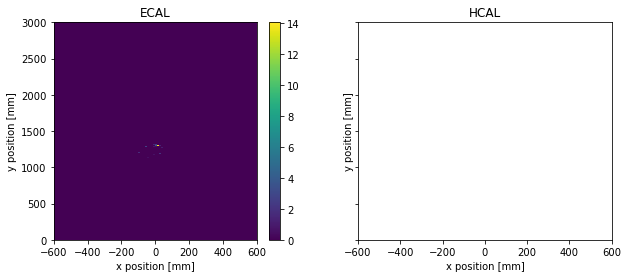

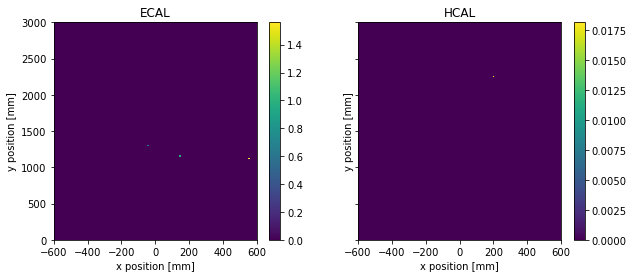

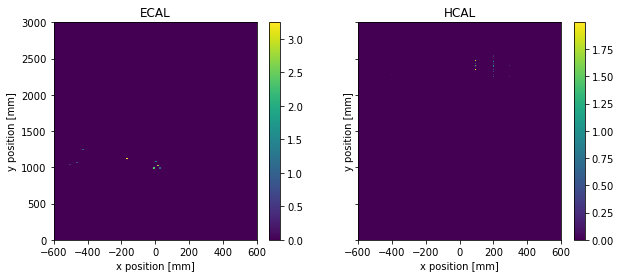

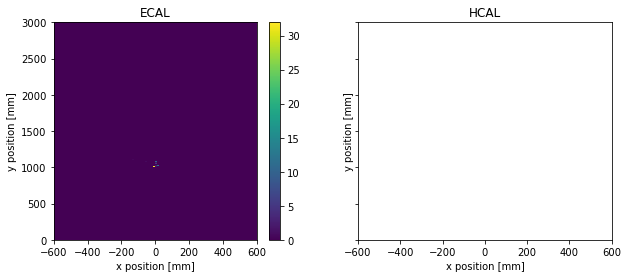

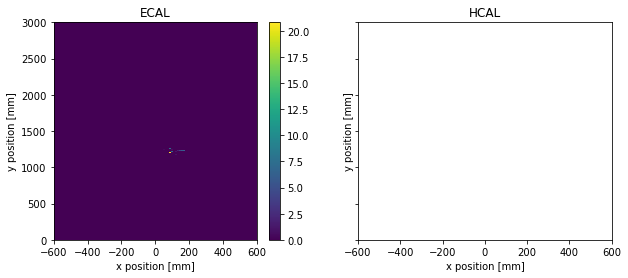

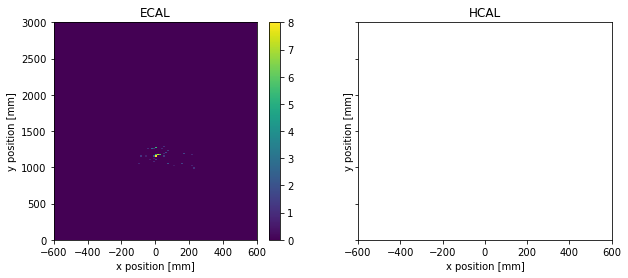

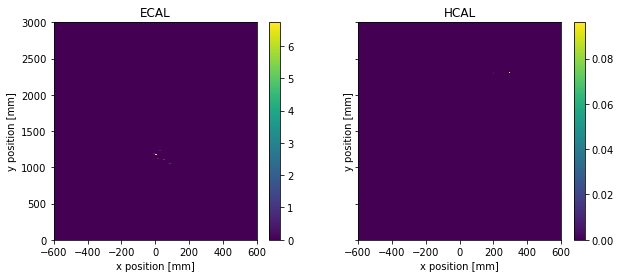

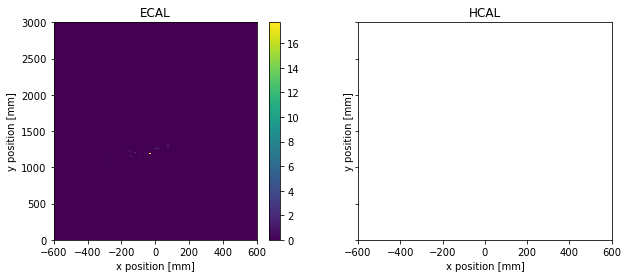

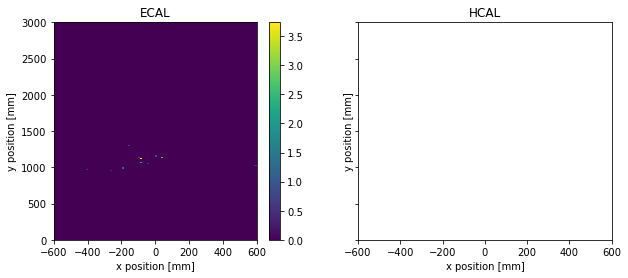

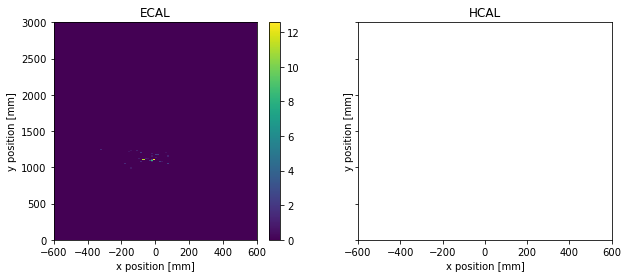

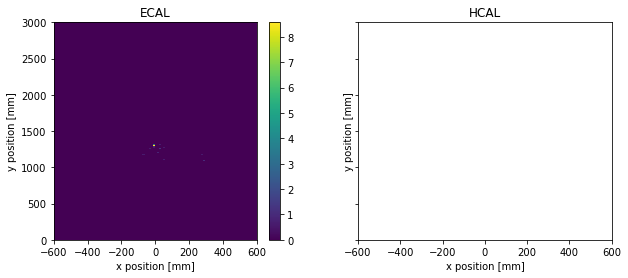

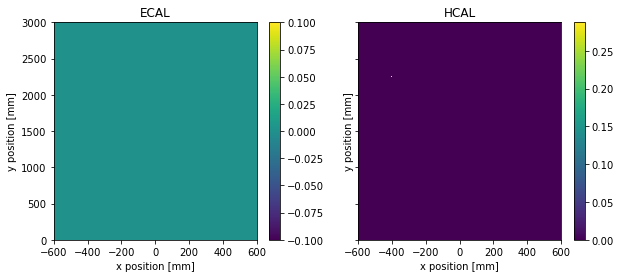

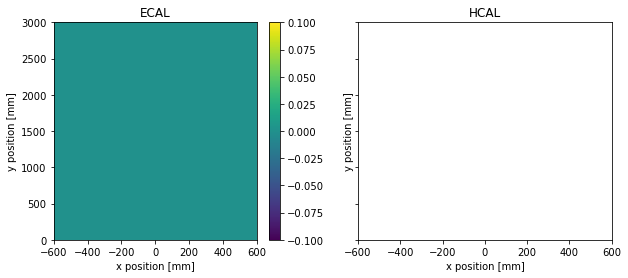

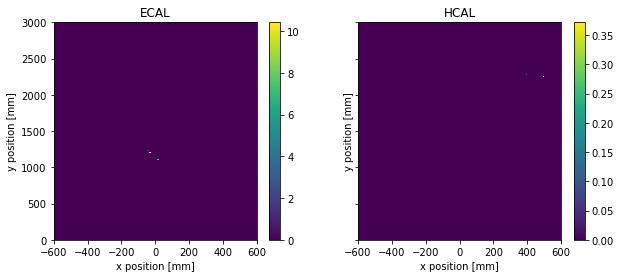

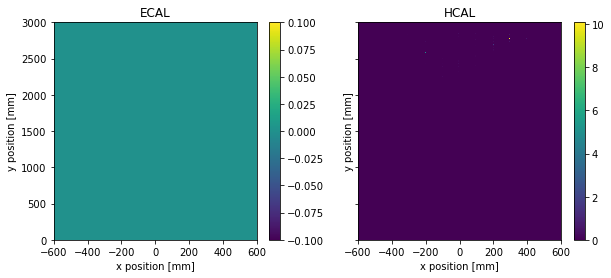

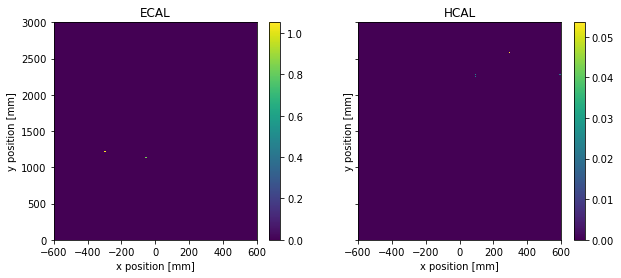

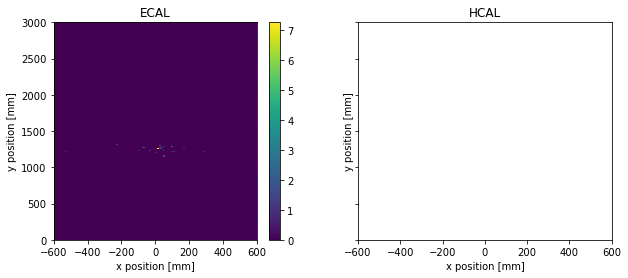

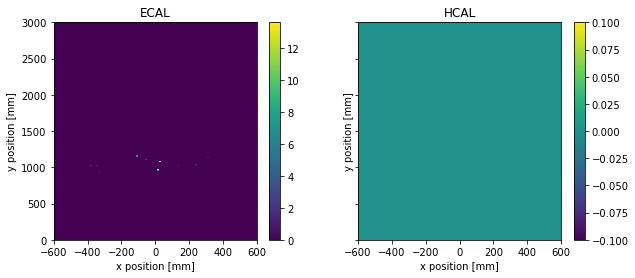

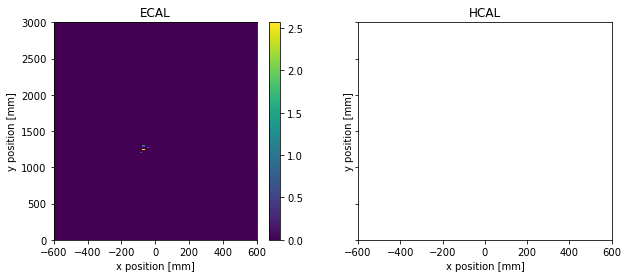

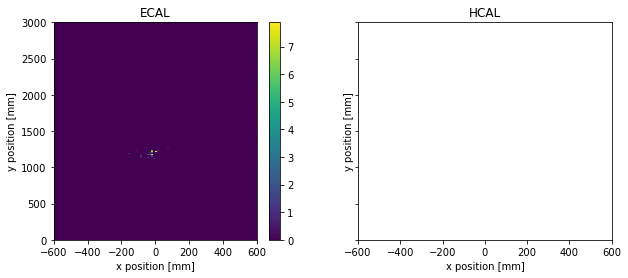

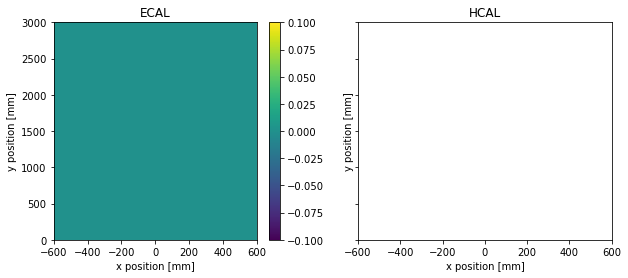

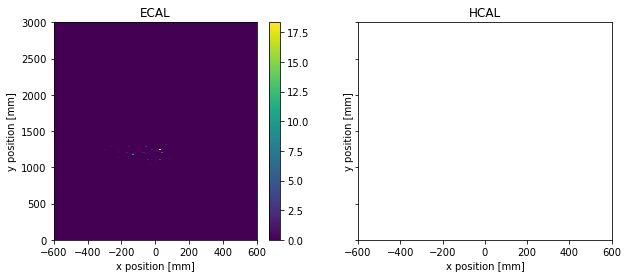

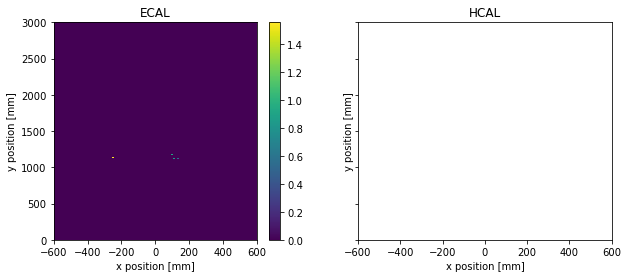

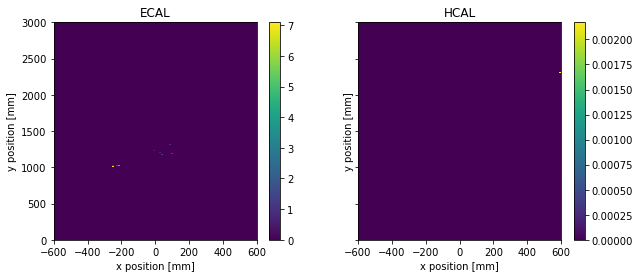

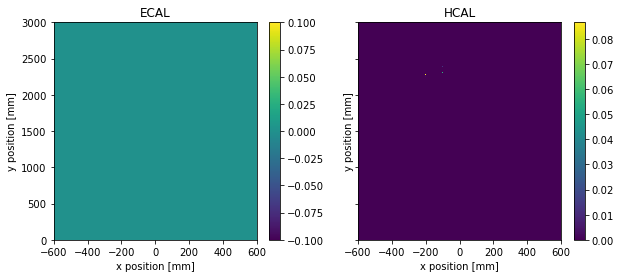

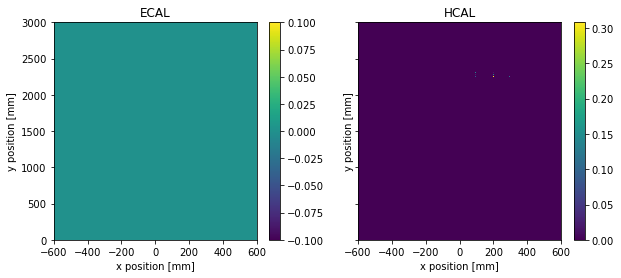

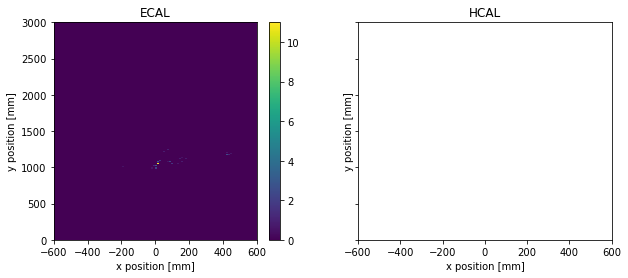

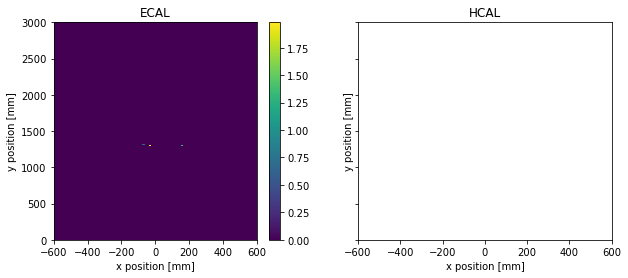

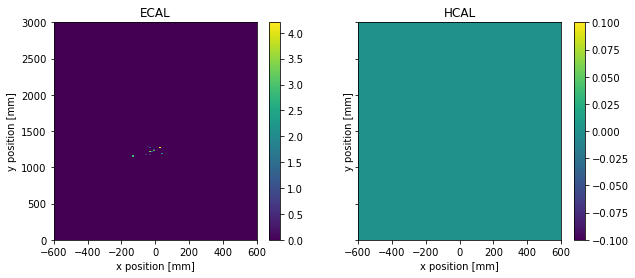

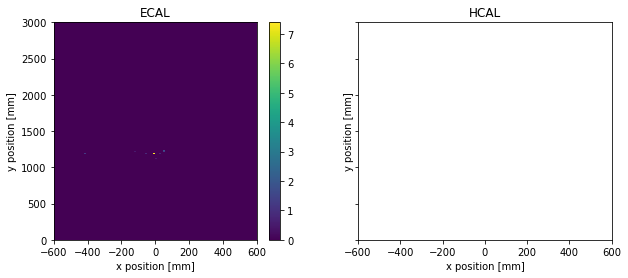

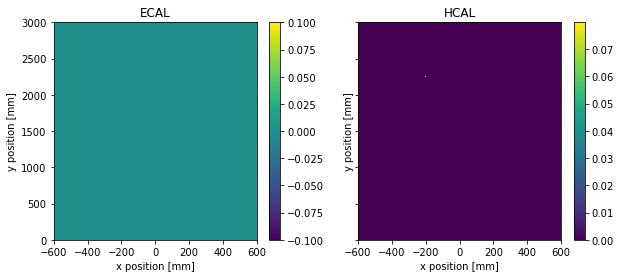

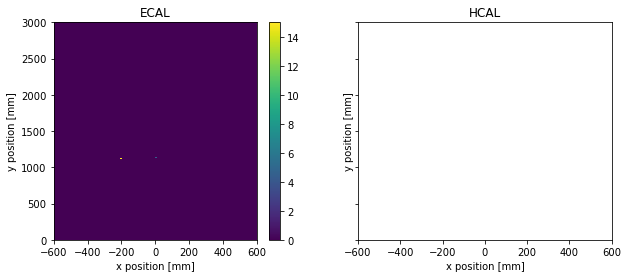

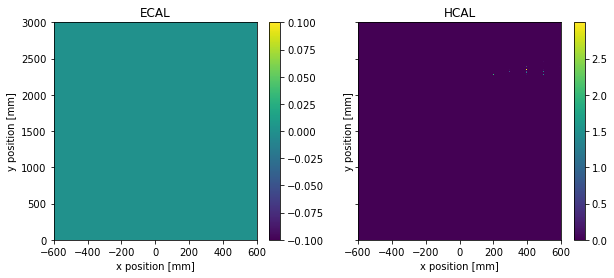

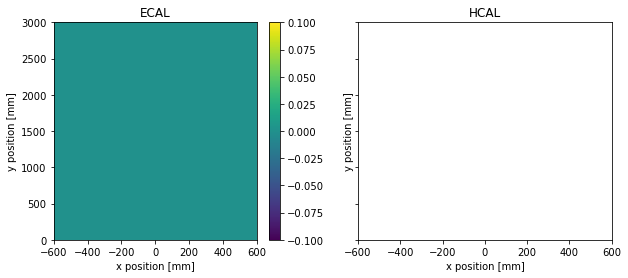

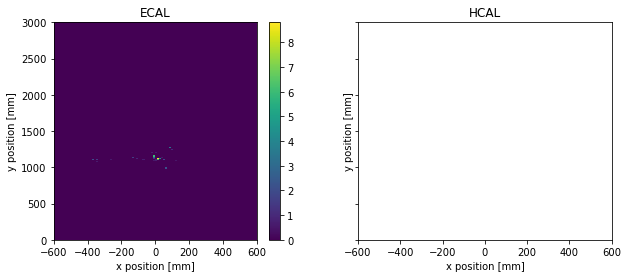

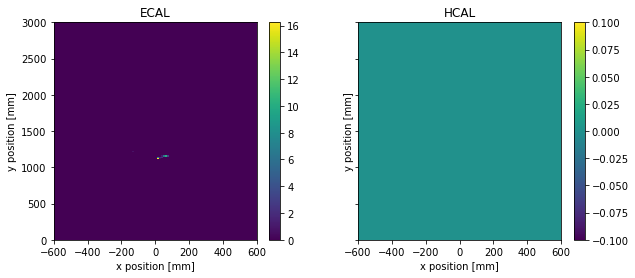

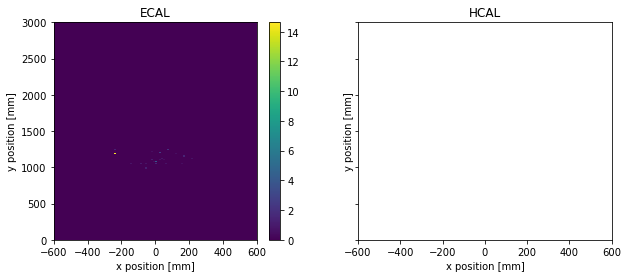

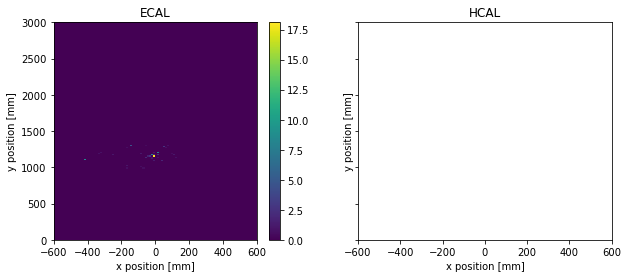

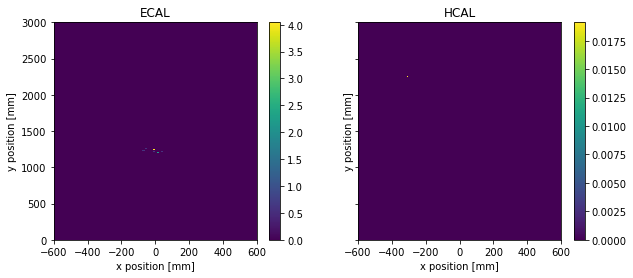

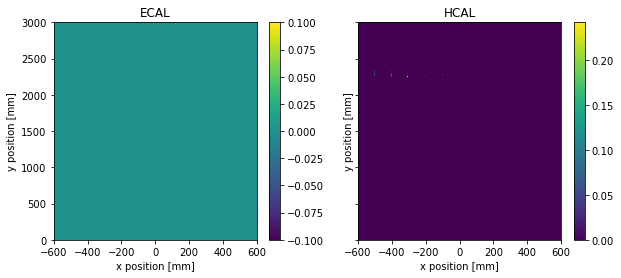

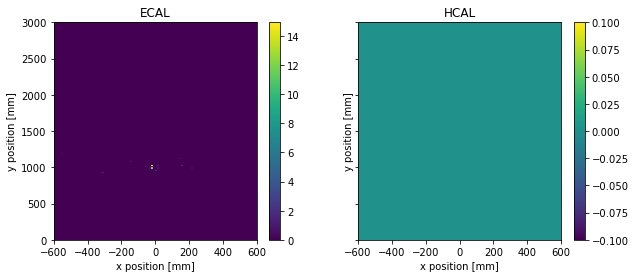

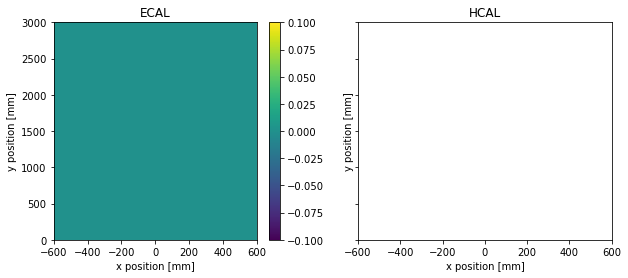

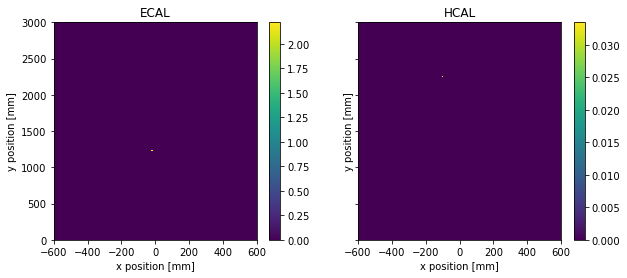

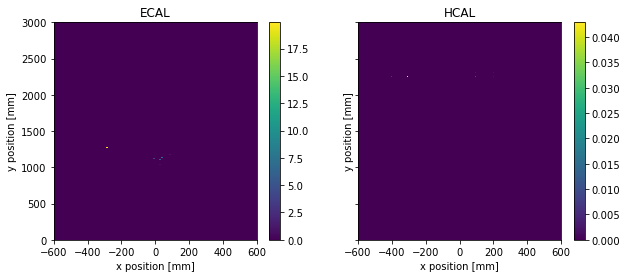

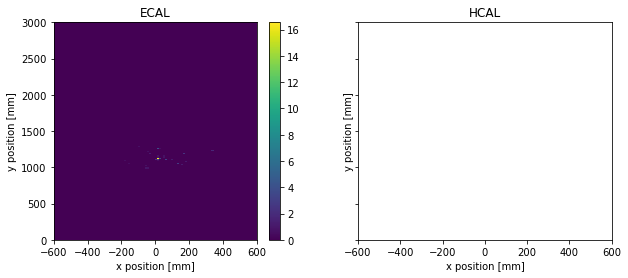

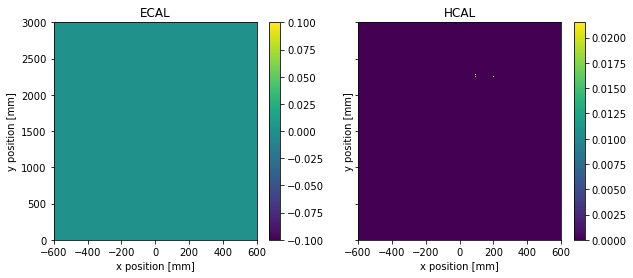

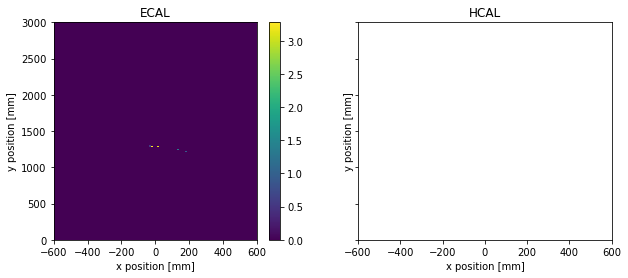

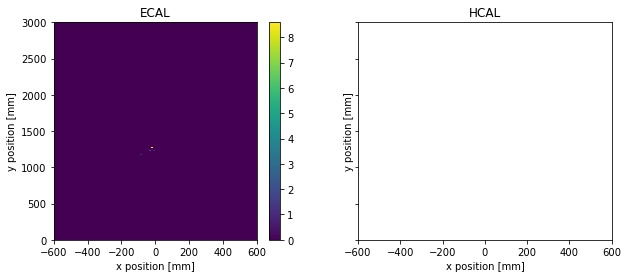

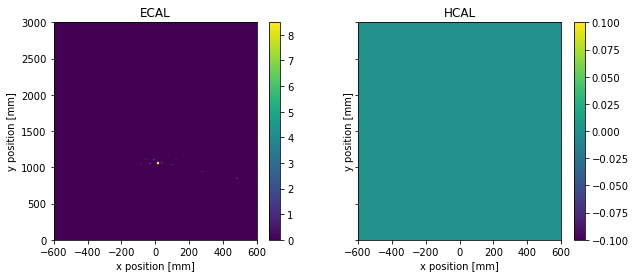

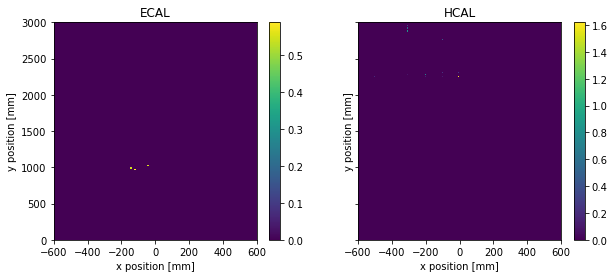

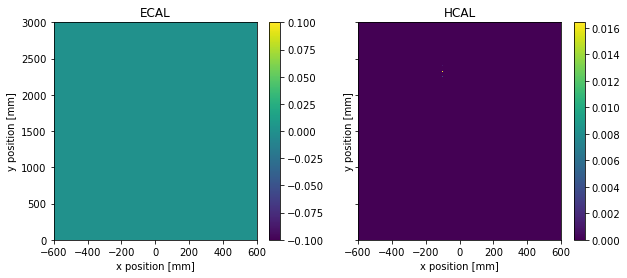

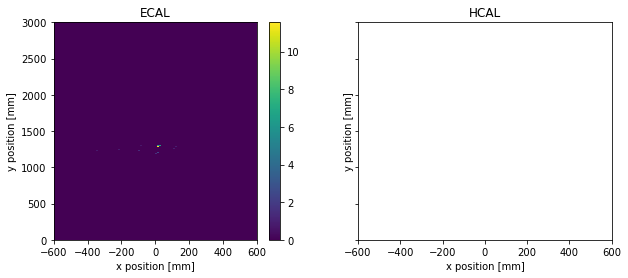

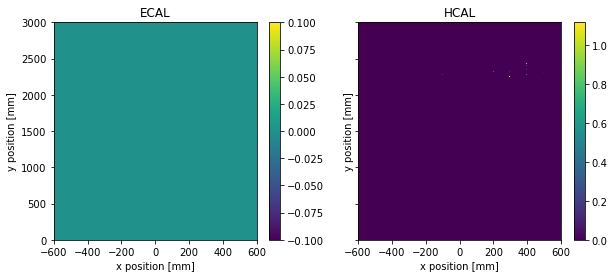

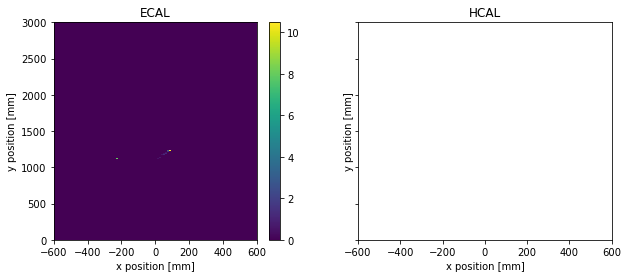

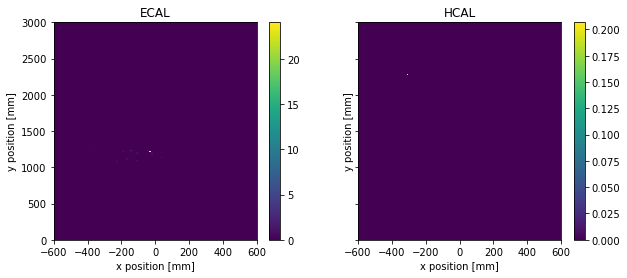

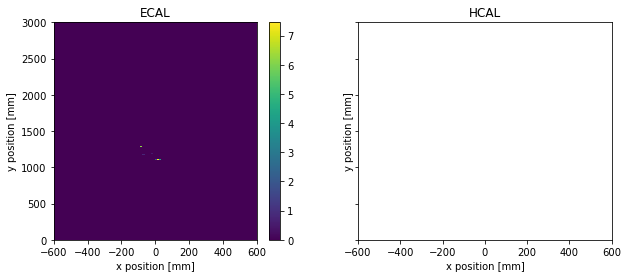

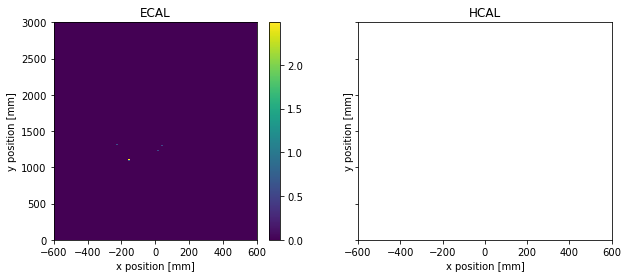

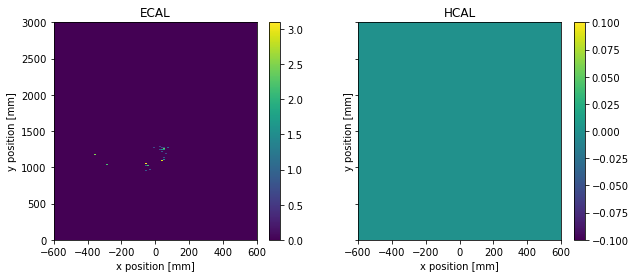

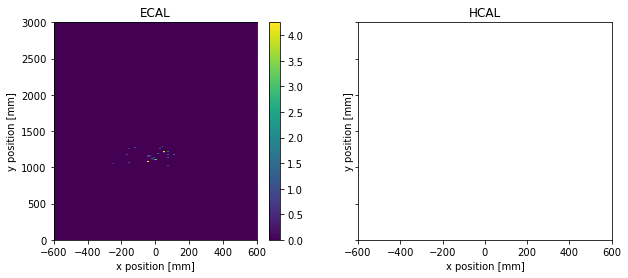

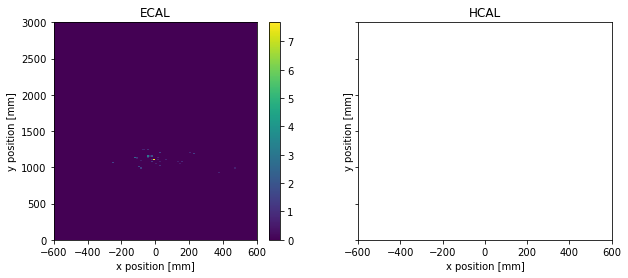

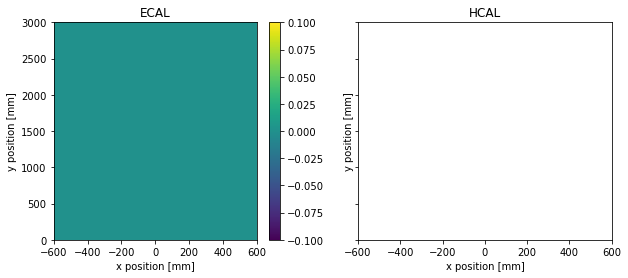

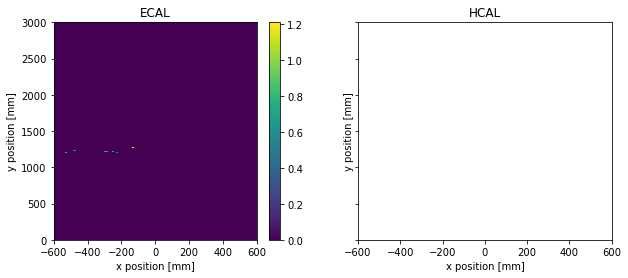

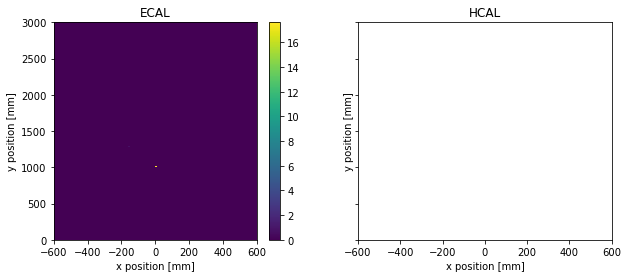

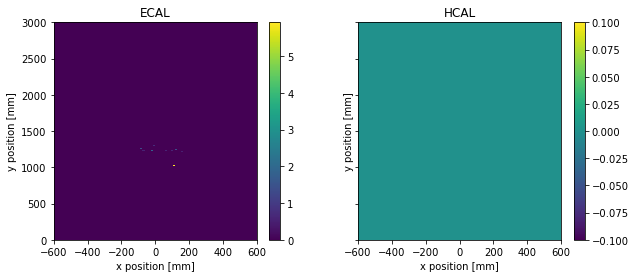

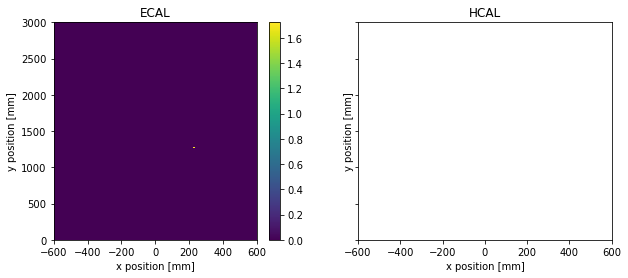

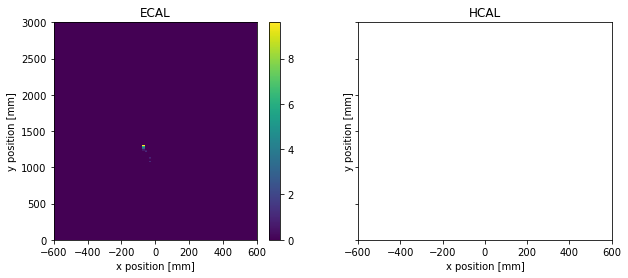

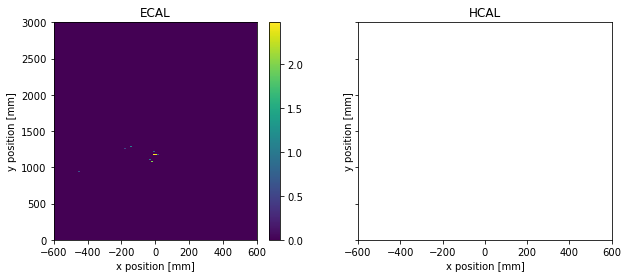

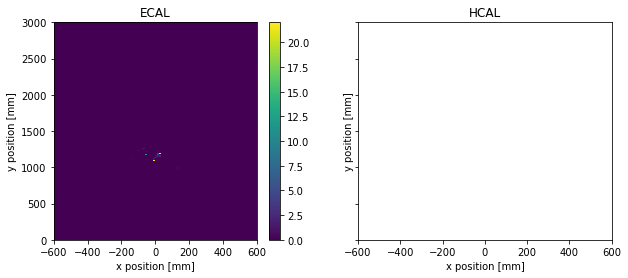

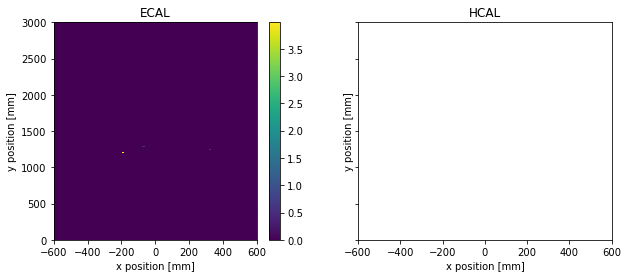

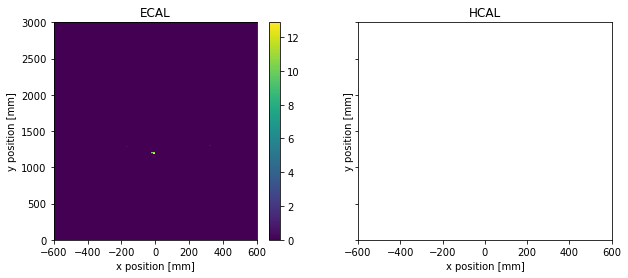

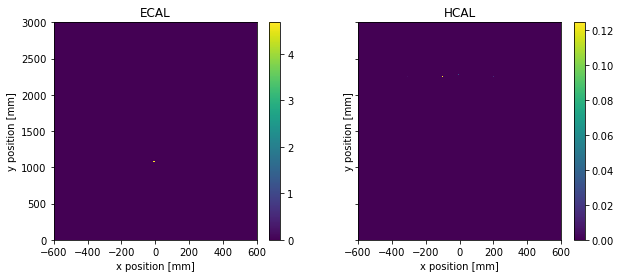

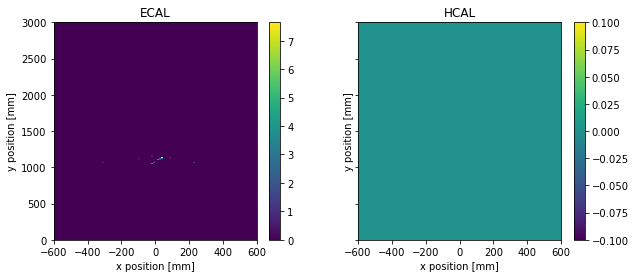

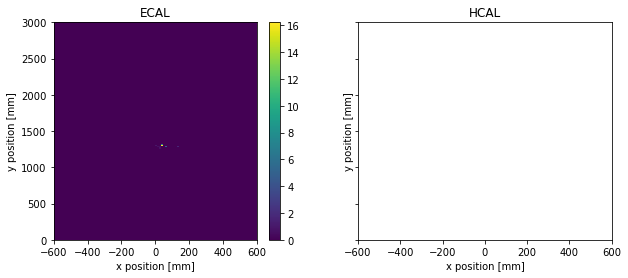

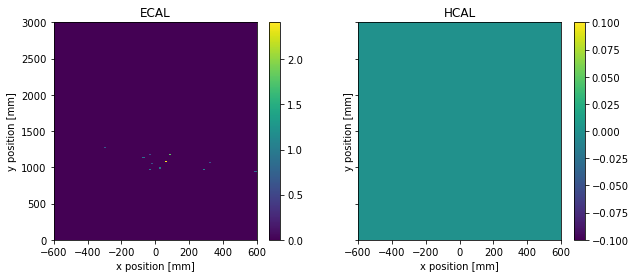

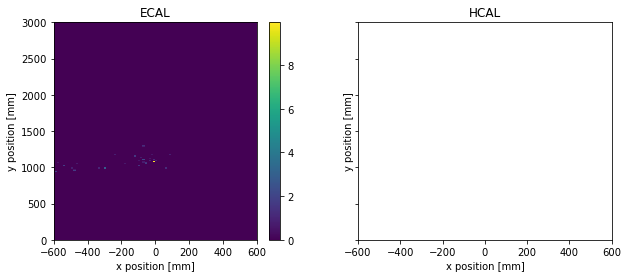

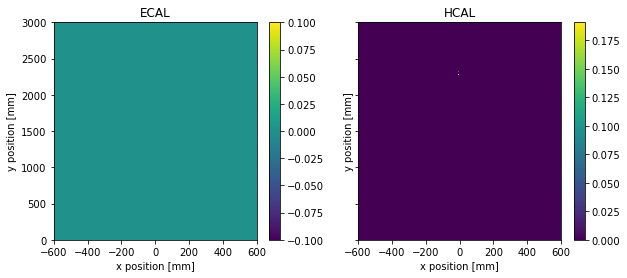

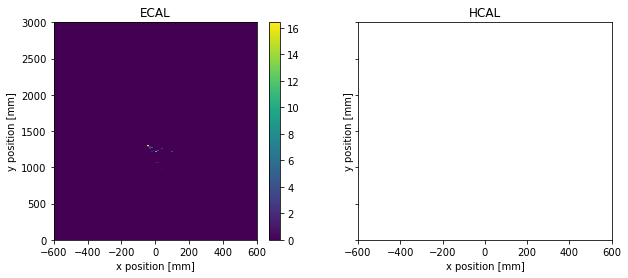

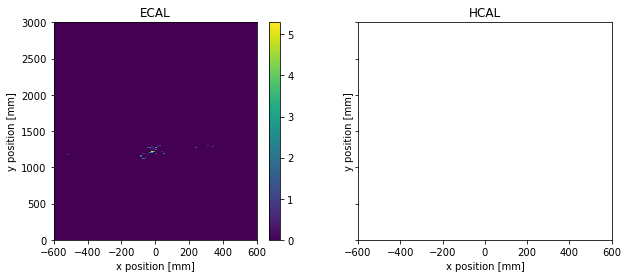

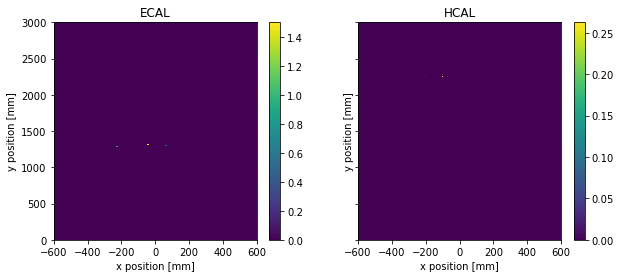

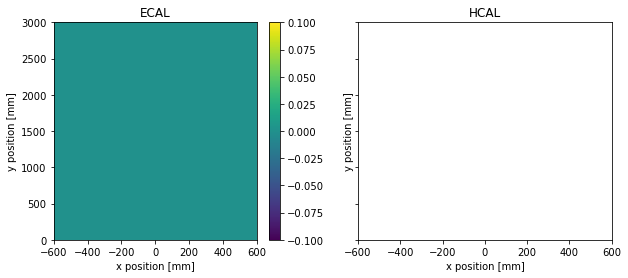

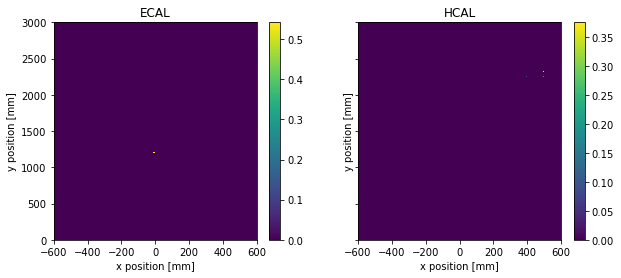

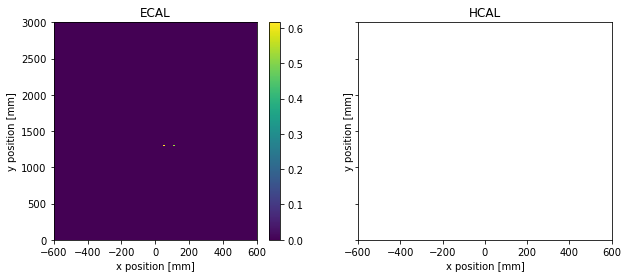

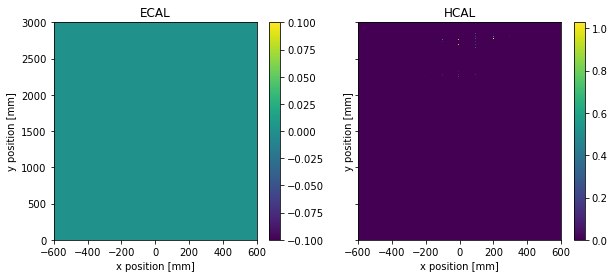

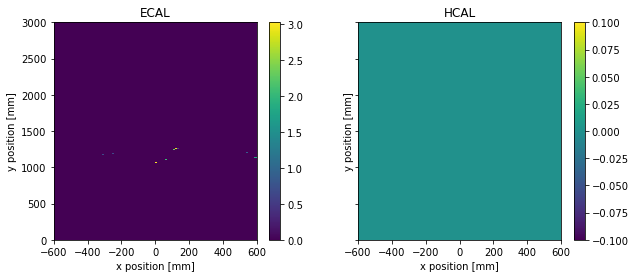

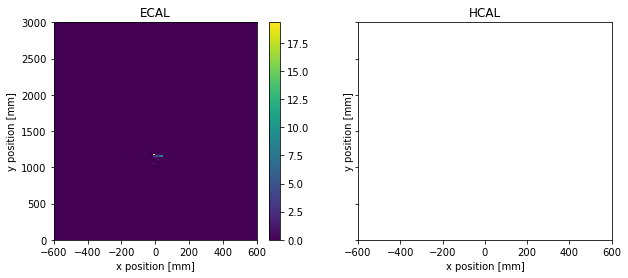

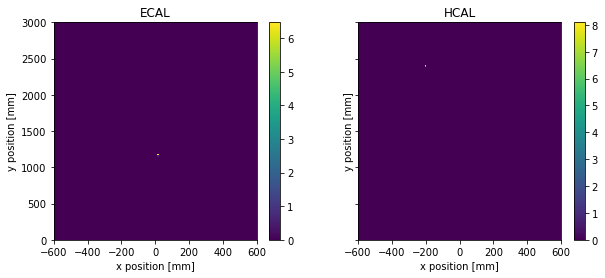

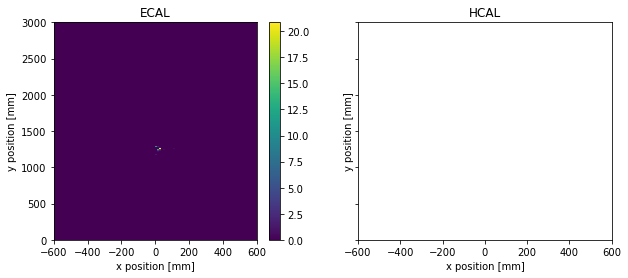

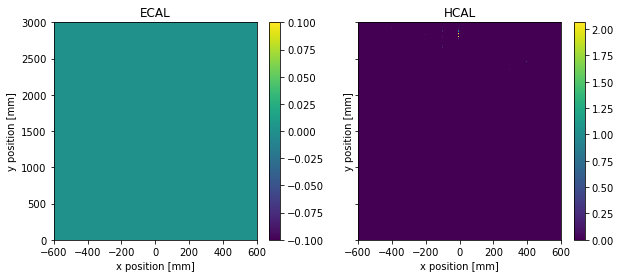

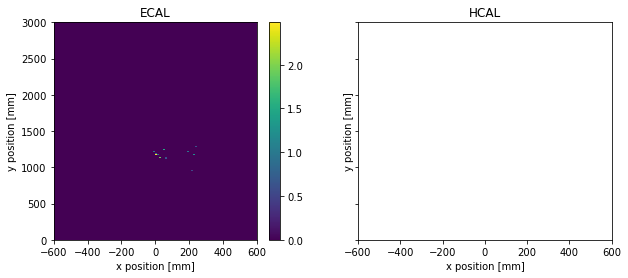

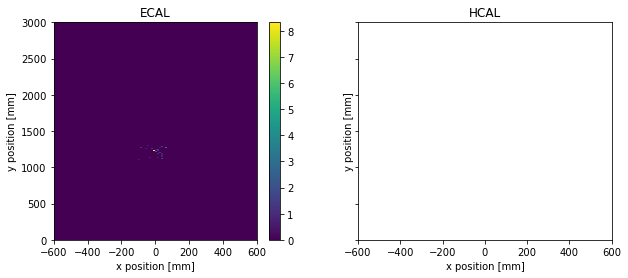

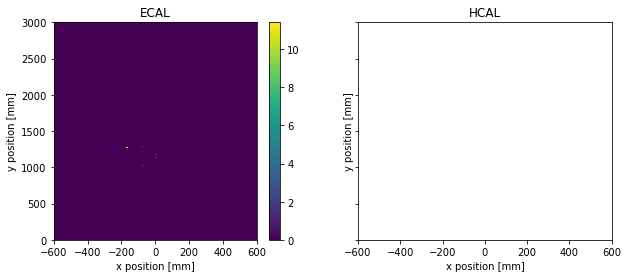

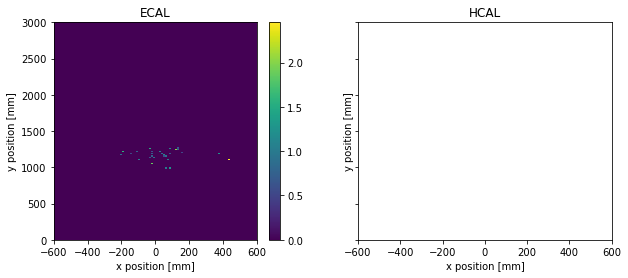

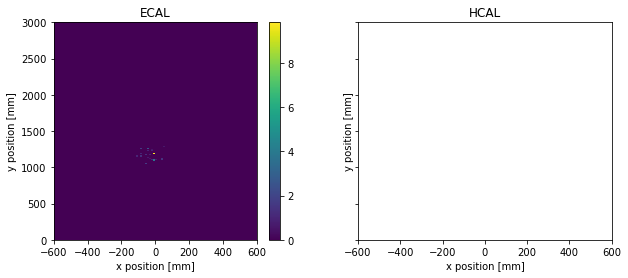

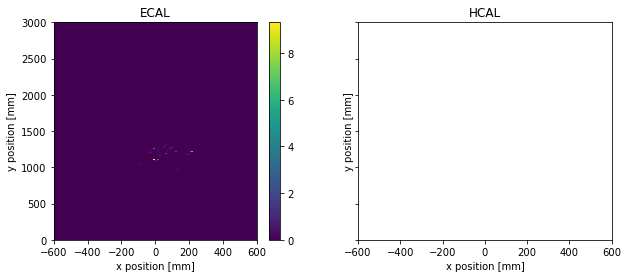

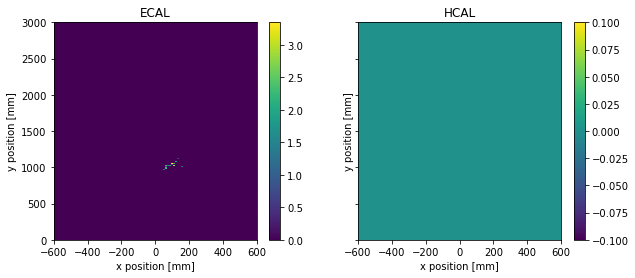

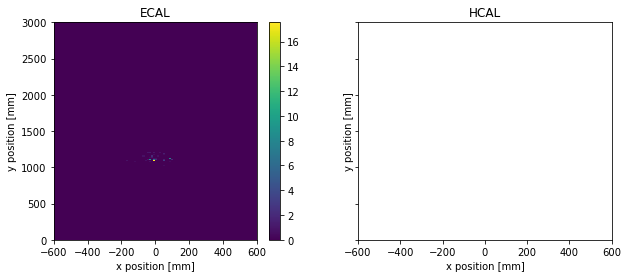

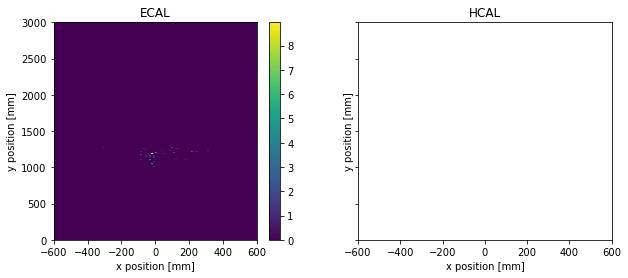

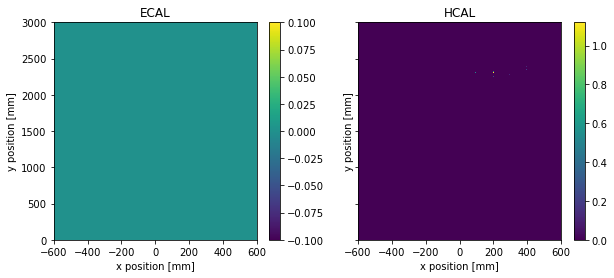

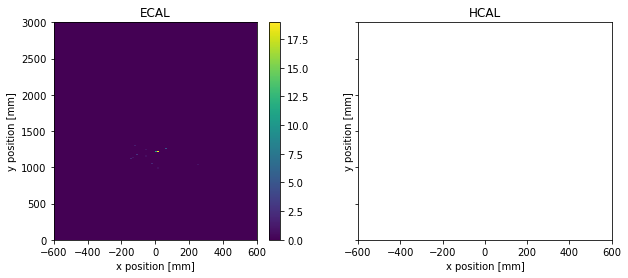

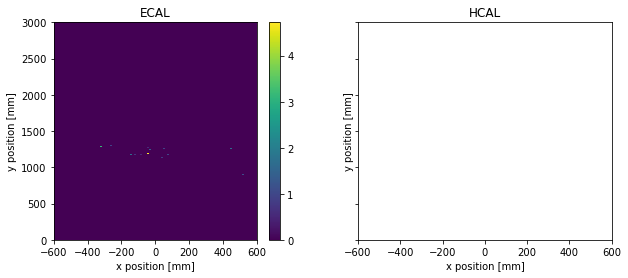

In [97]:
#loop over events
response = {}
response['energyDeposit']= np.array([])


for ievt in range(100):
    print('Event Number: ',ievt)
    fig,ax  = plt.subplots(1,2,figsize=(10,4),sharex=True, sharey=True)

    key = 'EcalBarrelScFi'
#        mask = [(E[key][ievt]>0.005) & (E[key][ievt]/np.sum(E[key][ievt])>0.001)]
    mask = [(E[key][ievt]>0.0005)]
   
    cell_x = x[key][ievt][mask]
    cell_y = y[key][ievt][mask]
    cell_E = E[key][ievt][mask]*1000.0 #(MeV)
    c = ax[0].hist2d(cell_x,cell_y, weights=cell_E, 
                     bins=[100,200],range=([[-600, 600], [0,3000]]))
    fig.colorbar(c[3], ax=ax[0])            
    suma_ECAL = np.sum(E[key][ievt])
    print(' Suma ECAL =%2.2f'%(suma_ECAL*1000.0))
    response['energyDeposit']= np.append(response['energyDeposit'], suma_ECAL*1000.0)

    
    ax[0].set_title('ECAL')
    ax[1].set_title('HCAL')
    ax[0].set_xlabel('x position [mm]')
    ax[0].set_ylabel('y position [mm]')
    ax[1].set_xlabel('x position [mm]')
    ax[1].set_ylabel('y position [mm]')
    
    key = 'HcalBarrel'
#        mask = [(E[key][ievt]>0.005) & (E[key][ievt]/np.sum(E[key][ievt])>0.001)]
    mask = [(E[key][ievt]>0.00)]
    if(np.sum(mask)<1): continue
    cell_x = x[key][ievt][mask]
    cell_y = y[key][ievt][mask]
    cell_E = E[key][ievt][mask]*1000.0 #(MeV)
    c = ax[1].hist2d(cell_x,cell_y, weights=cell_E, 
                     bins=[200,200],range=([[-600, 600], [0,3000]]))
    fig.colorbar(c[3], ax=ax[1])            
    suma_HCAL = np.sum(E[key][ievt])
    print(' Suma HCAL =%2.2f'%(suma_HCAL*1000.0))
    

    #for a in ax:
        #    a.set_xticklabels([])
        #    a.set_yticklabels([])
        #plt.subplots_adjust(wspace=0, hspace=0.5)


In [90]:
response['energyDeposit']

import pandas as pd

df = pd.DataFrame.from_dict(response)
df.head()
df.shape

(100, 1)

In [91]:
print(df.query('energyDeposit>10')['energyDeposit'].shape)
print(df.query('energyDeposit>-999')['energyDeposit'].shape)

#sf_ECAL = 0.253
#sf_HCAL = 0.025
    #print('Energy = %2.3f'%(suma_ECAL/sf_ECAL+suma_HCAL/sf_HCAL))
    ##suma_HCAL = np.sum(E[key][ievt])
    #print(suma_HCAL/sf_HCAL)

(68,)
(100,)


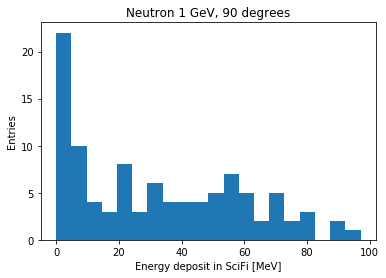

In [98]:
plt.hist(df['energyDeposit'],bins=20)
plt.xlabel('Energy deposit in SciFi [MeV]')
plt.ylabel('Entries')
plt.title('Neutron 1 GeV, 90 degrees')
plt.show()